<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/AutoEncoder_GAN_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

tf.random.set_seed(42)
np.random.seed(42)

#UnderComplete_AutoEncoder_PCA

In [73]:
#3 -> 2
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])
#2 -> 3
decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [74]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

    return data

X_train = generate_3d_data(60)
#(3, )
#print(X_train.mean(axis=0, keepdims=0).shape)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [75]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3131
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2919
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2724
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2553
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2375
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2207
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2049
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1896
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1756
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1488
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1371
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

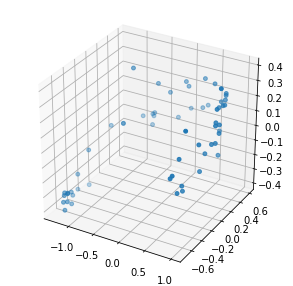

In [76]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

# scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
# 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
# marker = 점의 형태
# s = 점의 크기
# c = 점의 색깔
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], marker='o', s=15)

plt.show()

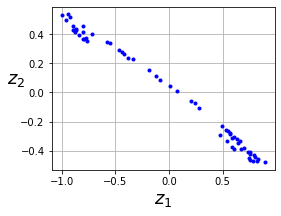

In [77]:
codings = encoder.predict(X_train)

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# StackedAutoEncoder_Fastion_MNIST

In [78]:
(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = X.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

X_train, X_valid = X[:-5000], X[-5000:]
y_train, y_valid = y[:-5000], y[-5000:]

In [79]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28]),
])

stacked_autoencoder = keras.models.Sequential([
    stacked_encoder,
    stacked_decoder
])

#binary_crossentropy 손실을 사용함. 재구성 작업을 다중 레이블 이진 분류로 다룬다.
stacked_autoencoder.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [80]:
history = stacked_autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3374 - val_loss: 0.3183
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3048 - val_loss: 0.3014
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2981 - val_loss: 0.2980
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2941 - val_loss: 0.2940
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2914 - val_loss: 0.2913
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2894 - val_loss: 0.2897
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2878 - val_loss: 0.2890
Epoch 8/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2866 - val_loss: 0.2928
Epoch 9/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2857 - val_loss: 0.2871
Epoch 10/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.284

#Fashion_MNIST_Visualization

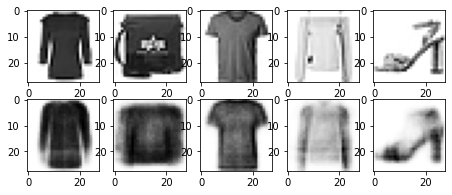

In [81]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")

show_reconstructions(stacked_autoencoder)

#Dimention_Reduction_AutoEncoder_And_TSEN

In [82]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
#정규화
X_valid_2D_norm = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


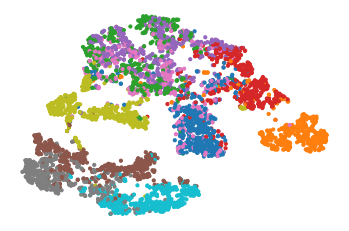

In [83]:
plt.scatter(X_valid_2D_norm[:, 0], X_valid_2D_norm[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

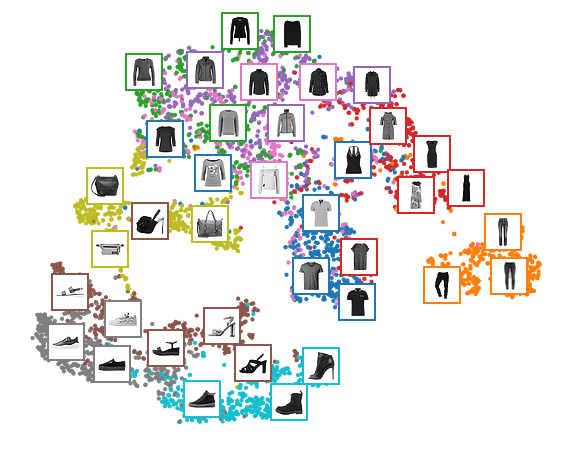

In [84]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10

plt.scatter(X_valid_2D_norm[:, 0], X_valid_2D_norm[:, 1], c=y_valid, s=10, cmap="tab10")
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D_norm):
    #점하나하나 펼쳐진 모든 이미지와의 거리를 구해서 어느정도 특정 거리 이상이면 그 점에 해당하는 이미지를 보여줌
    dist = np.sum((position - image_positions) ** 2, axis=1)

    if np.min(dist) > 0.01: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

# Weights_Shared

In [85]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        #transpose_b = True -> 두번째 행렬을 전치시키고 곱함
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [86]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))


In [87]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [88]:
stacked_autoencoder.summary()
print()
tied_ae.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_46 (Sequential)  (None, 30)                81530     
                                                                 
 sequential_47 (Sequential)  (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82414     
                                                                 
Total params: 82,414
Tra

In [89]:
history = tied_ae.fit(X_train, X_train, epochs=20,
                      validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3082 - val_rounded_accuracy: 0.9076
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2975 - rounded_accuracy: 0.9224 - val_loss: 0.2951 - val_rounded_accuracy: 0.9285
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3023 - val_rounded_accuracy: 0.9076
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2889 - rounded_accuracy: 0.9302 - val_loss: 0.2880 - val_rounded_accuracy: 0.9333
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - rounded_accuracy: 0.9325 - val_loss: 0.2874 - val_rounded_accuracy: 0.9313
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2861 - val_rounded_accuracy: 0.9353
Epoch 7/20
1719/1719 [==================

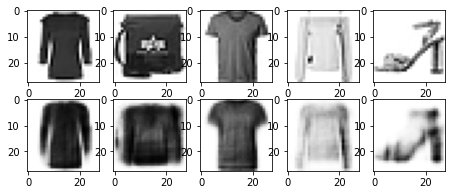

In [90]:
show_reconstructions(tied_ae)
plt.show()

# Greedy_Layerwise_AutoEncoder_Training

In [91]:
K = keras.backend

X_train_flatten = K.batch_flatten(X_train)
X_valid_flatten = K.batch_flatten(X_valid)

In [92]:
#784 -> 100
enc1 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[28*28], activation='selu'),
])
#100 -> 784
dec1 = keras.models.Sequential([
    keras.layers.Dense(28*28, input_shape=[100], activation='sigmoid'),
])
ae_1 = keras.models.Sequential([
    enc1,
    dec1,
])
ae_1.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
ae_1.fit(X_train_flatten, X_train_flatten, epochs=10, validation_data=[X_valid_flatten, X_valid_flatten])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3440 - rounded_accuracy: 0.8880 - val_loss: 0.3111 - val_rounded_accuracy: 0.9161
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3027 - rounded_accuracy: 0.9216 - val_loss: 0.2994 - val_rounded_accuracy: 0.9257
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2940 - rounded_accuracy: 0.9296 - val_loss: 0.2926 - val_rounded_accuracy: 0.9321
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2885 - rounded_accuracy: 0.9348 - val_loss: 0.2882 - val_rounded_accuracy: 0.9369
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2847 - rounded_accuracy: 0.9384 - val_loss: 0.2851 - val_rounded_accuracy: 0.9398
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2821 - rounded_accuracy: 0.9410 - val_loss: 0.2828 - val_rounded_accuracy: 0.9416
Epoch 7/10
1719/1719 [==================

In [93]:
X_train_enc1 = enc1(X_train_flatten)
X_valid_enc1 = enc1(X_valid_flatten)

In [94]:
#100 -> 30
enc2 = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=[100], activation='selu'),
])
#30 -> 100
dec2 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[30], activation='selu'),
])
ae_2 = keras.models.Sequential([
    enc2,
    dec2,
])
ae_2.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.05))
ae_2.fit(X_train_enc1, X_train_enc1, epochs=10, validation_data=[X_valid_enc1, X_valid_enc1])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6558 - val_loss: 0.3723
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3056 - val_loss: 0.2855
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2640 - val_loss: 0.2594
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2509 - val_loss: 0.2405
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2325 - val_loss: 0.2201
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2206 - val_loss: 0.2170
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2171 - val_loss: 0.2196
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2146 - val_loss: 0.2231
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2141 - val_loss: 0.2132
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.212

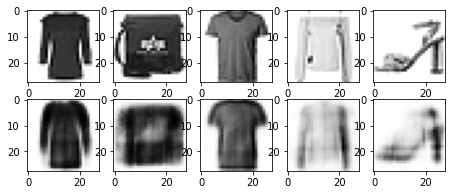

In [95]:
stacked_ae = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])
show_reconstructions(stacked_ae)
plt.show()

In [96]:
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2869 - rounded_accuracy: 0.9340 - val_loss: 0.2885 - val_rounded_accuracy: 0.9341
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - rounded_accuracy: 0.9345 - val_loss: 0.2881 - val_rounded_accuracy: 0.9345
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2862 - rounded_accuracy: 0.9348 - val_loss: 0.2879 - val_rounded_accuracy: 0.9345
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2860 - rounded_accuracy: 0.9350 - val_loss: 0.2877 - val_rounded_accuracy: 0.9352
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2858 - rounded_accuracy: 0.9353 - val_loss: 0.2875 - val_rounded_accuracy: 0.9354
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2856 - rounded_accuracy: 0.9355 - val_loss: 0.2873 - val_rounded_accuracy: 0.9352
Epoch 7/10
1719/1719 [==================

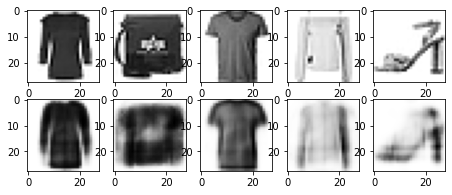

In [97]:
show_reconstructions(stacked_ae)
plt.show()

# Convolutional_Autoencoder

In [98]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3016 - rounded_accuracy: 0.9192 - val_loss: 0.2822 - val_rounded_accuracy: 0.9389
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2758 - rounded_accuracy: 0.9413 - val_loss: 0.2737 - val_rounded_accuracy: 0.9437
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2709 - rounded_accuracy: 0.9460 - val_loss: 0.2711 - val_rounded_accuracy: 0.9473
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2683 - rounded_accuracy: 0.9488 - val_loss: 0.2687 - val_rounded_accuracy: 0.9488
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2665 - rounded_accuracy: 0.9507 - val_loss: 0.2665 - val_rounded_accuracy: 0.9523


In [99]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)        

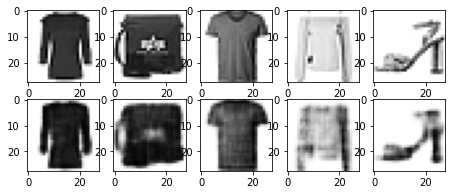

In [100]:
show_reconstructions(conv_ae)
plt.show()

# Recurrent_Autoencoder

In [101]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30),
])

recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation='sigmoid'))
])

recurrent_ae = keras.models.Sequential([
    recurrent_encoder,
    recurrent_decoder
])

recurrent_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])

In [102]:
recurrent_encoder.summary()
recurrent_decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 100)           51600     
                                                                 
 lstm_1 (LSTM)               (None, 30)                15720     
                                                                 
Total params: 67,320
Trainable params: 67,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 repeat_vector (RepeatVector  (None, 28, 30)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 28, 100)           52400     
                          

In [103]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 19s 9ms/step - loss: 0.5055 - rounded_accuracy: 0.7681 - val_loss: 0.4378 - val_rounded_accuracy: 0.8087
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3930 - rounded_accuracy: 0.8493 - val_loss: 0.3709 - val_rounded_accuracy: 0.8680
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3635 - rounded_accuracy: 0.8711 - val_loss: 0.3636 - val_rounded_accuracy: 0.8713
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3515 - rounded_accuracy: 0.8796 - val_loss: 0.3474 - val_rounded_accuracy: 0.8856
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3421 - rounded_accuracy: 0.8855 - val_loss: 0.3403 - val_rounded_accuracy: 0.8872
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3350 - rounded_accuracy: 0.8907 - val_loss: 0.3334 - val_rounded_accuracy: 0.8897
Epoch 7/10
1719/1719 [============

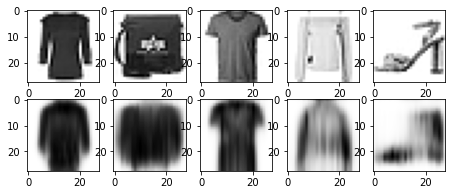

In [104]:
show_reconstructions(recurrent_ae)
plt.show()

# GaussianNoise_Denoising_Autoencoder

In [108]:
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28, 28]),
])

denoising_ae = keras.models.Sequential([
    denoising_encoder,
    denoising_decoder,
])
denoising_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])

In [109]:
denoising_ae.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3481 - rounded_accuracy: 0.8786 - val_loss: 0.3178 - val_rounded_accuracy: 0.9080
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3125 - rounded_accuracy: 0.9094 - val_loss: 0.3076 - val_rounded_accuracy: 0.9163
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3048 - rounded_accuracy: 0.9160 - val_loss: 0.3022 - val_rounded_accuracy: 0.9183
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3008 - rounded_accuracy: 0.9195 - val_loss: 0.2983 - val_rounded_accuracy: 0.9238
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2981 - rounded_accuracy: 0.9218 - val_loss: 0.2960 - val_rounded_accuracy: 0.9261
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2961 - rounded_accuracy: 0.9235 - val_loss: 0.2950 - val_rounded_accuracy: 0.9278
Epoch 7/10
1719/1719 [==================

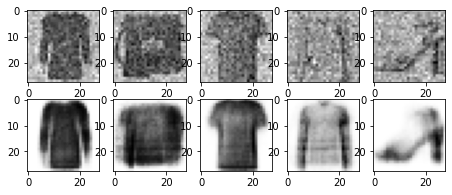

In [110]:
noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

# Dropout_Restore_Autoencoder

In [111]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28, 28]),
])
dropout_ae = keras.models.Sequential([
    dropout_encoder,
    dropout_decoder,
])
dropout_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])

In [112]:
history = dropout_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3566 - rounded_accuracy: 0.8710 - val_loss: 0.3196 - val_rounded_accuracy: 0.9055
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3181 - rounded_accuracy: 0.9034 - val_loss: 0.3110 - val_rounded_accuracy: 0.9121
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3121 - rounded_accuracy: 0.9082 - val_loss: 0.3065 - val_rounded_accuracy: 0.9158
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3084 - rounded_accuracy: 0.9111 - val_loss: 0.3031 - val_rounded_accuracy: 0.9193
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3056 - rounded_accuracy: 0.9133 - val_loss: 0.3005 - val_rounded_accuracy: 0.9210
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3036 - rounded_accuracy: 0.9149 - val_loss: 0.3001 - val_rounded_accuracy: 0.9180
Epoch 7/10
1719/1719 [==================

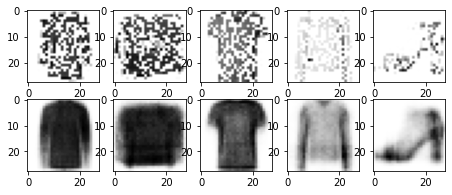

In [113]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))

# Sparse_AutoEncoder

- compared_simple_encoder

In [116]:
#비교군
simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=10,
                        validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4335 - rounded_accuracy: 0.7958 - val_loss: 0.3771 - val_rounded_accuracy: 0.8495
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3606 - rounded_accuracy: 0.8683 - val_loss: 0.3516 - val_rounded_accuracy: 0.8819
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3417 - rounded_accuracy: 0.8851 - val_loss: 0.3380 - val_rounded_accuracy: 0.8871
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3288 - rounded_accuracy: 0.8960 - val_loss: 0.3258 - val_rounded_accuracy: 0.9003
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3214 - rounded_accuracy: 0.9011 - val_loss: 0.3214 - val_rounded_accuracy: 0.9027
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3181 - rounded_accuracy: 0.9034 - val_loss: 0.3183 - val_rounded_accuracy: 0.9035
Epoch 7/10
1719/1719 [==================

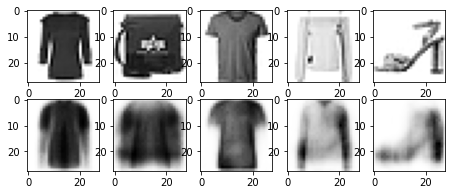

In [117]:
show_reconstructions(simple_ae)
plt.show()

In [125]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)
    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

(30,)


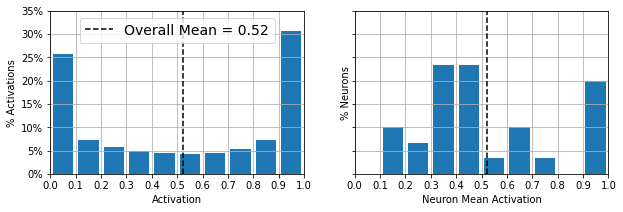

In [126]:
#simple_encoder(x) -> N , 30
plot_activations_histogram(simple_encoder, height=0.35)
plt.show()

- sparse_autoencoder

In [127]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4330 - rounded_accuracy: 0.8122 - val_loss: 0.3818 - val_rounded_accuracy: 0.8533
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3697 - rounded_accuracy: 0.8676 - val_loss: 0.3645 - val_rounded_accuracy: 0.8732
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3553 - rounded_accuracy: 0.8786 - val_loss: 0.3512 - val_rounded_accuracy: 0.8844
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3443 - rounded_accuracy: 0.8862 - val_loss: 0.3427 - val_rounded_accuracy: 0.8869
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3378 - rounded_accuracy: 0.8907 - val_loss: 0.3372 - val_rounded_accuracy: 0.8921
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3328 - rounded_accuracy: 0.8950 - val_loss: 0.3329 - val_rounded_accuracy: 0.8961
Epoch 7/10
1719/1719 [==================

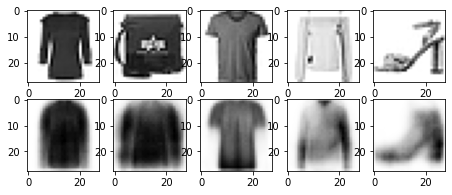

In [129]:
show_reconstructions(sparse_l1_ae)
plt.show()

(300,)


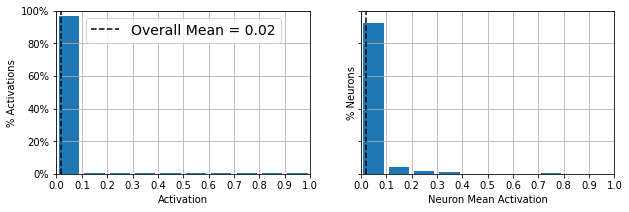

In [130]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

# Kullback-Leibier_Divergence

(0.0, 1.0, 0.0, 1.0)

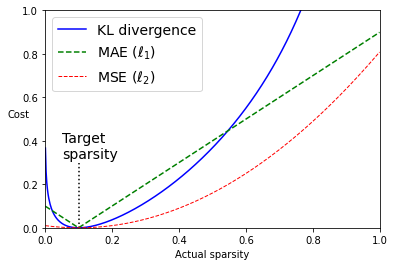

In [137]:
#타깃 희소값
p = 0.1
#현재 희소값
q = np.linspace(0.001, 0.999, 500)
#쿨백 라이블러 계산
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
#mse 
mse = (p - q)**2
#mas
mae = np.abs(p - q)

plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 1])